In [140]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

Load data and check types

In [92]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 12 columns):
Pid         877 non-null int64
pclass      877 non-null int64
survived    877 non-null int64
name        877 non-null object
sex         877 non-null object
age         691 non-null float64
sibsp       877 non-null int64
parch       877 non-null int64
ticket      877 non-null object
fare        876 non-null float64
cabin       187 non-null object
embarked    875 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.3+ KB


Dealing with missing numerical values

In [93]:
avgAge=df['age'].mean()
avgFare=df['fare'].mean()

In [94]:
maxAge=df['age'].max()
minAge=df['age'].min()
maxFare=df['age'].max()
minFare=df['age'].min()

In [95]:
df['age'] = df['age'].fillna(avgAge) 

In [96]:
df['fare'] = df['fare'].fillna(avgFare) 

Dealing with missing categorical values

In [97]:
freq_port = df.embarked.dropna().mode()[0]
freq_port

'S'

Converting categorical variables to numerical mapping

In [98]:
df['embarked'] = df['embarked'].fillna(freq_port) 

In [99]:
df['embarked'] = df['embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df['sex'] = df['sex'].map( {'male': 0, 'female': 1} ).astype(int)

Creating a new variable called Title

In [100]:
df['Title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [101]:
df['Title']=df['Title'].replace(['Lady', 'Countess','Capt', 'Col''Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Special')

In [102]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [103]:
df['Title'] = df['Title'].map({"Mr": 1, "Miss": 4, "Mrs": 4, "Master": 3, "Special": 5})

In [104]:
df['Title']=df['Title'].fillna(0)

Dropping a few unncecessary variables

In [105]:
df=df.drop(labels=['cabin'],axis=1)
df=df.drop(labels=['ticket'],axis=1)
df=df.drop(labels=['name'],axis=1)
df=df.drop(labels=['Pid'],axis=1)

In [106]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Title
0,3,0,0,35.0,0,0,8.0500,0,1.0
1,2,1,1,28.0,0,0,13.0000,0,4.0
2,1,1,1,32.0,0,0,76.2917,1,4.0
3,2,1,1,24.0,2,3,18.7500,0,4.0
4,3,0,0,1.0,4,1,39.6875,0,3.0


Normalizing numerical variables

In [107]:
df['age']=(df['age']-minAge)/(maxAge-minAge)

In [108]:
df['fare']=(df['fare']-minFare)/(maxFare-minFare)

Creating a new variable: Family size

In [109]:
df['familySize']=1+df['sibsp']+df['parch']

Preparing data for training

In [110]:
X_train=df.drop(labels=['survived'],axis=1)
y_train=df['survived']

In [111]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,Title,familySize
0,3,0,0.435147,0,0,0.096862,0,1.0,1
1,2,1,0.347281,0,0,0.158996,0,4.0,1
2,1,1,0.397490,0,0,0.953452,1,4.0,1
3,2,1,0.297071,2,3,0.231172,0,4.0,6
4,3,0,0.008369,4,1,0.493986,0,3.0,6


Training using RandomForest

In [22]:
clf1 = RandomForestClassifier(random_state=0)

In [23]:
clf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [47]:
X_train_f,X_test_v,y_train_f,y_test_v = train_test_split(X_train,y_train,test_size = 0.30,random_state=42)


#TODO
clf = RandomForestClassifier()        #Initialize the classifier object

parameters = {'n_estimators':[5,10,20,30,40,50]}    #Dictionary of parameters

scorer = make_scorer(accuracy_score)         #Initialize the scorer using make_scorer

grid_obj = GridSearchCV(clf,parameters,scoring=scorer)         #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = grid_obj.fit(X_train_f,y_train_f)        #Fit the gridsearch object with X_train,y_train

best_clf = grid_fit.best_estimator_         #Get the best estimator. For this, check documentation of GridSearchCV object

#unoptimized_predictions = (clf.fit(X_train, y_train)).predict(X_test)      #Using the unoptimized classifiers, generate predictions
#optimized_predictions = best_clf.predict(X_test)        #Same, but use the best estimator

#acc_unop = accuracy_score(y_test, unoptimized_predictions)*100       #Calculate accuracy for unoptimized model
#acc_op = accuracy_score(y_test, optimized_predictions)*100         #Calculate accuracy for optimized model

#print("Accuracy score on unoptimized model:{}".format(acc_unop))
#print("Accuracy score on optimized model:{}".format(acc_op))

Logistic Regression

In [55]:
X_train_f,X_test_v,y_train_f,y_test_v = train_test_split(X_train,y_train,test_size = 0.30,random_state=42)


#TODO
clf = LogisticRegression()        #Initialize the classifier object

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }    #Dictionary of parameters

scorer = make_scorer(accuracy_score)         #Initialize the scorer using make_scorer

grid_obj = GridSearchCV(clf,parameters,scoring=scorer)         #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = grid_obj.fit(X_train_f,y_train_f)        #Fit the gridsearch object with X_train,y_train

best_clf = grid_fit.best_estimator_         #Get the best estimator. For this, check documentation of GridSearchCV object

Decision Tree

In [129]:
X_train_f,X_test_v,y_train_f,y_test_v = train_test_split(X_train,y_train,test_size = 0.30,random_state=42)


#TODO
clf = DecisionTreeClassifier()        #Initialize the classifier object

parameters = {'max_depth': range(2,25)}
scorer = make_scorer(accuracy_score)         #Initialize the scorer using make_scorer

grid_obj = GridSearchCV(clf,parameters,scoring=scorer)         #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = grid_obj.fit(X_train_f,y_train_f)        #Fit the gridsearch object with X_train,y_train

best_clf = grid_fit.best_estimator_        



Loading test data and performing identical preprocessing

In [113]:
df_t=pd.read_csv('test.csv')

In [114]:
df_t.isnull().values.any()

True

In [115]:
df_t['age'] = df_t['age'].fillna(avgAge) 
df_t['sex'] = df_t['sex'].map( {'male': 0, 'female': 1} ).astype(int)
df_t['embarked'] = df_t['embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [116]:
df_t['Title'] = df_t.name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_t['Title']=df_t['Title'].replace(['Lady', 'Countess','Capt', 'Col''Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Special')
df_t['Title'] = df_t['Title'].replace('Mlle', 'Miss')
df_t['Title'] = df_t['Title'].replace('Ms', 'Miss')
df_t['Title'] = df_t['Title'].replace('Mme', 'Mrs')
df_t['Title'] = df_t['Title'].map({"Mr": 1, "Miss": 4, "Mrs": 4, "Master": 2, "Special": 5})
df_t['Title']=df_t['Title'].fillna(0)

In [117]:
df_t=df_t.drop(labels=['name','ticket','cabin'],axis=1)

In [118]:
df_t['age']=(df_t['age']-minAge)/(maxAge-minAge)
df_t['fare']=(df_t['fare']-minFare)/(maxFare-minFare)

In [119]:
df_t['familySize']=1+df_t['sibsp']+df_t['parch']

In [120]:
Pid=df_t['Pid']
X_test=df_t.drop(labels=['Pid'],axis=1)

In [121]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,Title,familySize
0,3,0,0.447699,0,0,-0.004184,0,1.0,1
1,1,0,0.158996,2,2,3.289225,1,2.0,5
2,1,1,0.799163,1,1,0.329080,0,4.0,3
3,1,1,0.497908,0,0,1.922123,0,4.0,1
4,3,0,0.347281,2,0,0.095293,0,1.0,3


In [122]:
#Test

In [130]:
y_pred_dt = best_clf.predict(X_test)

In [131]:
dfy=pd.DataFrame(y_pred_dt)

In [132]:
dfp=pd.DataFrame(Pid)

In [133]:
dfy.columns=['survived']

In [134]:
resultsF=[dfp,dfy]
finalSub = pd.concat(resultsF,axis=1)

In [135]:
finalSub.to_csv("out.csv",index=False)

Some random plotting to try and improve the final accuracy

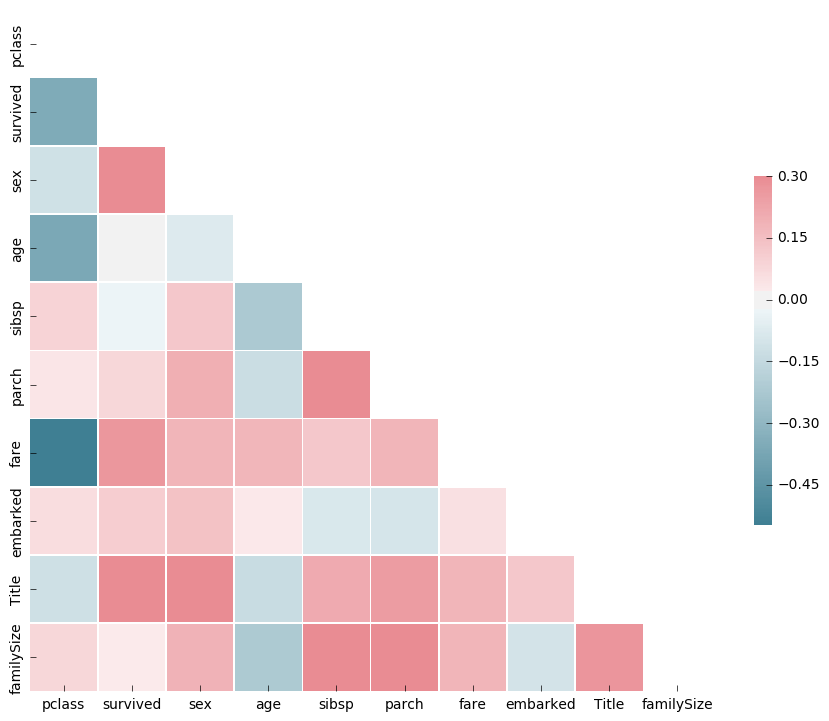

In [139]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()